In [109]:
import cv2
image = cv2.imread("./data/2.png",cv2.IMREAD_GRAYSCALE)


In [33]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

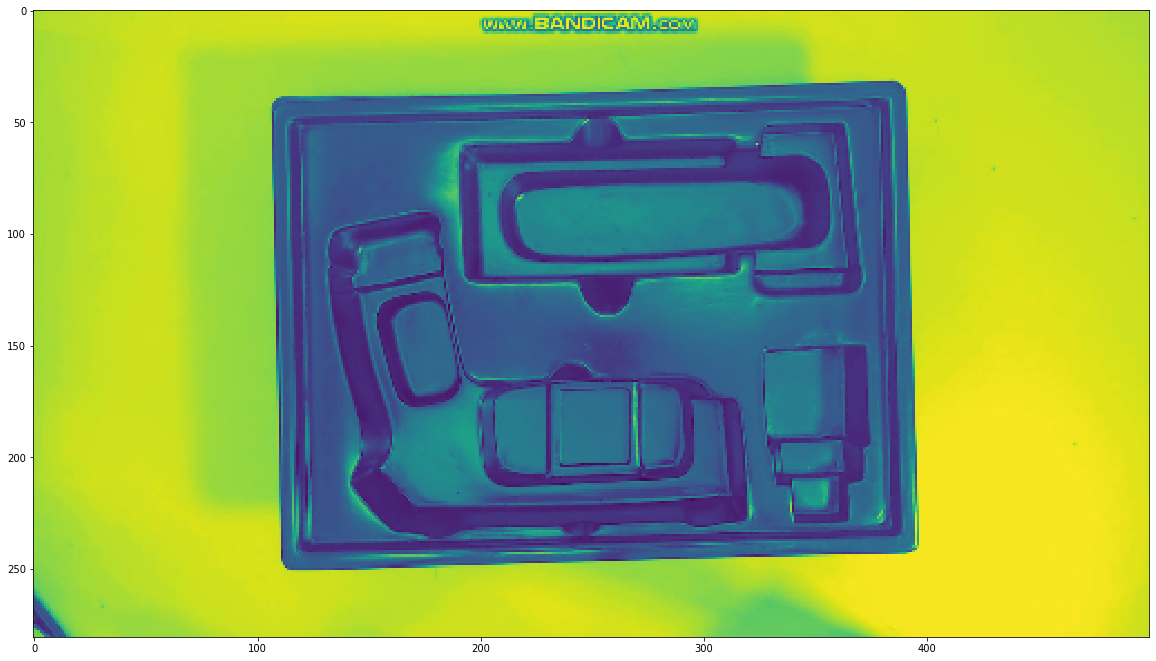

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plt.imshow(image)
plt.show()

In [85]:
# Threshold image
_,im = cv2.threshold(image, 60, 80, cv2.THRESH_BINARY)

im = cv2.GaussianBlur(im, (25, 25), 0)
# Calculate Moments
moments = cv2.moments(im)
 
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)
print(huMoments)

[[ 3.05134544e-03]
 [ 2.67039598e-06]
 [ 2.37058916e-12]
 [ 1.34619720e-12]
 [-2.32403801e-24]
 [-2.07865669e-15]
 [-6.18251978e-25]]


In [86]:
from math import copysign, log10
# Log scale hu moments
for i in range(0,7):
  huMoments[i] = -1* copysign(1.0,huMoments[i])*log10(abs(huMoments[i]))
print(huMoments)

[[  2.51550862]
 [  5.57342433]
 [ 11.62514371]
 [ 11.87089132]
 [-23.63375677]
 [-14.68221723]
 [-24.20883449]]


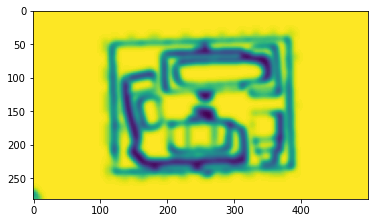

In [87]:
plt.imshow(im)
plt.show()

In [88]:
d1 = cv2.matchShapes(im,im,cv2.CONTOURS_MATCH_I1,0)
print(d1)

0.0


In [89]:
(h, w) = im.shape[:2]
# calculate the center of the image
center = (w / 2, h / 2)
scale = 1.0
angle180 = 180.0

In [90]:
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle180, scale)
im2 = cv2.warpAffine(im, M, (w, h))

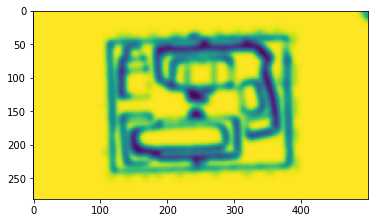

In [91]:
plt.imshow(im2)
plt.show()

In [84]:
d1 = cv2.matchShapes(im,im2,cv2.CONTOURS_MATCH_I1,0)
print(d1)

0.00014061988238039946


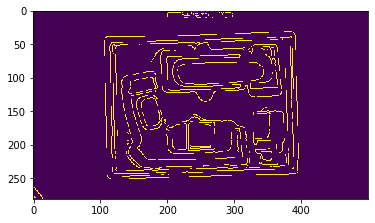

In [99]:
temp=image.copy()
temp = cv2.GaussianBlur(temp, (5,5), 0)
edges = cv2.Canny(temp,10,200)
plt.imshow(edges)
plt.show()

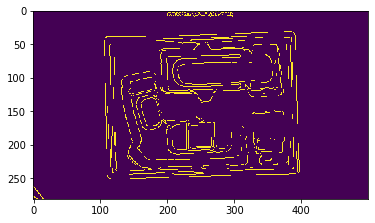

In [100]:
edges = cv2.Canny(image,225,250)
plt.imshow(edges)
plt.show()

In [101]:
import numpy as np
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

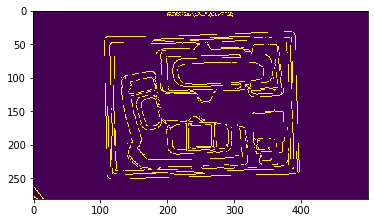

In [102]:
edges = auto_canny(image)
plt.imshow(edges)
plt.show()

https://medium.com/analytics-vidhya/tutorial-how-to-scale-and-rotate-contours-in-opencv-using-python-f48be59c35a2
    https://stackoverflow.com/questions/34237253/detect-centre-and-angle-of-rectangles-in-an-image-using-opencv/34285205
        https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html

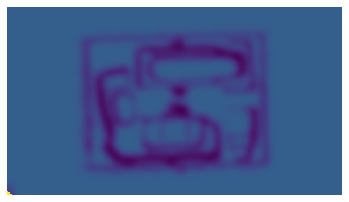

In [108]:
# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(image, 127, 255, 0)
_, contours, _  = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
plt.imshow(im_copy)
plt.axis("off");